In [1]:
#import requiered packages and libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

#load the dataset onto the notebook 
df = pd.read_csv('medical_clean.csv', index_col=0)

#check datafrme
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [167]:
#drop columns that are not related to the research question
df = df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 'Children', 'Marital', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp','Soft_drink', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'TotalCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

#visually inspect df to facilitate exploration, spot problems
pd.set_option('display.max_columns', None)
df

,Area,Age,Income,Gender,ReAdmis,VitD_levels,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Services,Initial_days,Additional_charges
CaseOrder,,,,,,,,,,,,,,,,
1,Suburban,53,86575.93,Male,No,19.141466,Emergency Admission,Yes,No,Medium,No,Yes,Yes,Blood Work,10.585770,17939.403420
2,Urban,51,46805.99,Female,No,18.940352,Emergency Admission,Yes,No,High,Yes,No,No,Intravenous,15.129562,17612.998120
3,Suburban,53,14370.14,Female,No,18.057507,Elective Admission,Yes,No,Medium,Yes,No,Yes,Blood Work,4.772177,17505.192460
4,Suburban,78,39741.49,Male,No,16.576858,Elective Admission,No,Yes,Medium,No,Yes,No,Blood Work,1.714879,12993.437350
5,Rural,22,1209.56,Female,No,17.439069,Elective Admission,No,No,Low,No,No,No,CT Scan,1.254807,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Urban,25,45967.61,Male,No,16.980860,Emergency Admission,Yes,No,Medium,No,No,No,Intravenous,51.561220,8927.642000
9997,Urban,87,14983.02,Male,Yes,18.177020,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,CT Scan,68.668240,28507.150000
9998,Rural,45,65917.81,Female,Yes,17.129070,Elective Admission,Yes,No,High,Yes,No,No,Intravenous,70.154180,15281.210000


In [168]:
#detection of duplicates True is missing value detected
df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [169]:
#count True and False together
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [170]:
#detect missing values
df.isnull().sum()

Area                  0
Age                   0
Income                0
Gender                0
ReAdmis               0
VitD_levels           0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Services              0
Initial_days          0
Additional_charges    0
dtype: int64

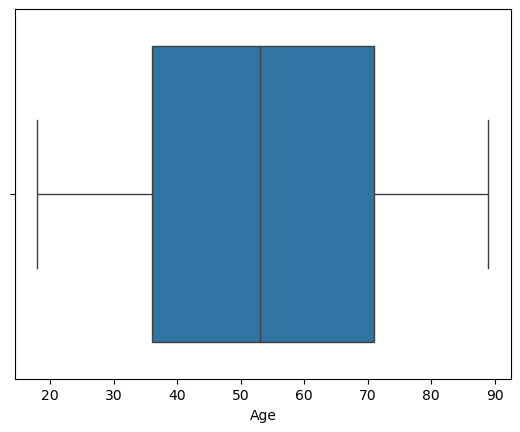

In [171]:
#check outliers for Age
sns.boxplot(x=df['Age'])
#display the plot
plt.show()

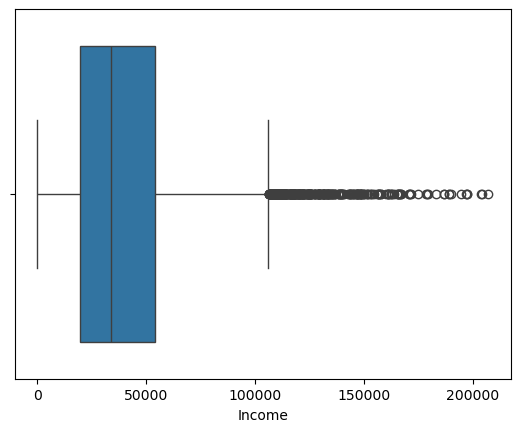

In [172]:
#check outliers for Income
sns.boxplot(x=df['Income'])
#display the plot
plt.show()

In [173]:
#check the outliers using z-scores in Income
df['Z_Score_Income'] = stats.zscore(df['Income'])
df[['Income','Z_Score_Income']].head()
df_outliers = df.query('(Z_Score_Income > 3) | (Z_Score_Income < -3)')

#number of outliers in Income
print("Number of outliers:", df_outliers.shape[0])

#get the range of outliers in Income
outliers_range = df_outliers['Income'].min(), df_outliers['Income'].max()

#Print the range of outliers in Income
print("Range of outliers for 'Income':", outliers_range)

Number of outliers: 143
Range of outliers for 'Income': (126063.69, 207249.1)


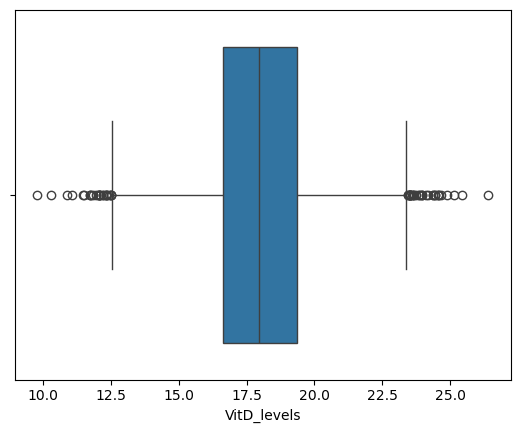

In [174]:
#check outliers for VitD_levels
sns.boxplot(x=df['VitD_levels'])
#display the plot
plt.show()

In [175]:
#check the outliers using z-scores in VitD_levels
df['Z_Score_VitD_levels'] = stats.zscore(df['VitD_levels'])
df[['VitD_levels','Z_Score_VitD_levels']].head()
df_outliers = df.query('(Z_Score_VitD_levels > 3) | (Z_Score_VitD_levels < -3)')

#number of outliers in VitD_levels
print("Number of outliers:", df_outliers.shape[0])

#get the range of outliers in VitD_levels
outliers_range = df_outliers['VitD_levels'].min(), df_outliers['VitD_levels'].max()

#Print the range of outliers in VitD_levels
print("Range of outliers for 'VitD_levels':", outliers_range)

Number of outliers: 24
Range of outliers for 'VitD_levels': (9.806483, 26.39444871)


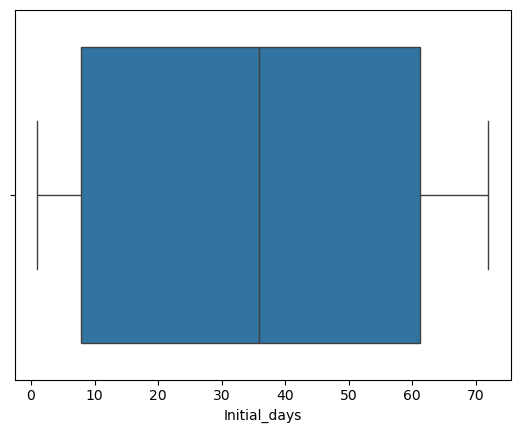

In [176]:
#create a boxplot for Initial_days
sns.boxplot(x=df['Initial_days'])
#display the plot
plt.show()


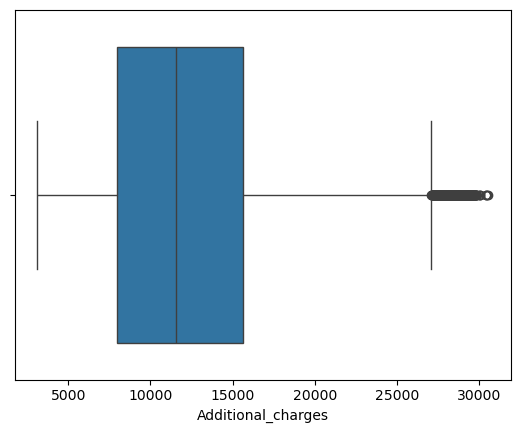

In [177]:
#create a boxplot for Additional_charges
sns.boxplot(x=df['Additional_charges'])
#display the plot
plt.show()

In [178]:
#check the outliers using z-scores in Additional_charges
df['Z_Score_Additional_charges'] = stats.zscore(df['Additional_charges'])
df[['Additional_charges','Z_Score_Additional_charges']].head()
df_outliers = df.query('(Z_Score_Additional_charges > 3) | (Z_Score_Additional_charges < -3)')
#number of outliers in Additional_charges
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in Additional_charges
outliers_range = df_outliers['Additional_charges'].min(), df_outliers['Additional_charges'].max()
#print the range of outliers in Additional_charges
print("Range of outliers for 'Additional_charges':", outliers_range)

Number of outliers: 0
Range of outliers for 'Additional_charges': (nan, nan)


In [179]:
#drop Z_Score_Additional_charges, Z_Score_Income, Z_Score_vitD_levels
df = df.drop(columns=['Z_Score_Additional_charges', 'Z_Score_Income', 'Z_Score_VitD_levels'])


In [180]:
#get summary statistics for quantitative variables 
df.describe()

,Age,Income,VitD_levels,Initial_days,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,17.964262,34.455299,12934.528587
std,20.638538,28521.153293,2.017231,26.309341,6542.601544
min,18.000000,154.080000,9.806483,1.001981,3125.703000
25%,36.000000,19598.775000,16.626439,7.896215,7986.487755
50%,53.000000,33768.420000,17.951122,35.836244,11573.977735
75%,71.000000,54296.402500,19.347963,61.161020,15626.490000
max,89.000000,207249.100000,26.394449,71.981490,30566.070000


In [181]:
#summary for categorical Area
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [182]:
#summary for categorical Gender
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [183]:
#summary for categorica ReAdmis
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [184]:
#summary for categorical Initial_admin
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [185]:
#summary for categorical HighBlood
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [186]:
#summary for categorical Stroke
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [187]:
#summary for categorical Complication_risk
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [188]:
#summary for categorical Overweight
df.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [189]:
#summary for categorical Arthritis
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [190]:
#summary for categorical Diabetes
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [191]:
#summary for Services
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [192]:
#convert ReAdmis, Stroke, Arthritis, Diabetes, HighBlood, Overweight from string to boolean
bool_mapping = {"Yes" : 1, "No" : 0}

df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)

df["Stroke"] = df["Stroke"].map(bool_mapping)

df["Arthritis"] = df["Arthritis"].map(bool_mapping)

df["Diabetes"] = df["Diabetes"].map(bool_mapping)

df["HighBlood"] = df["HighBlood"].map(bool_mapping)

df["Overweight"] = df["Overweight"].map(bool_mapping)

#convert Area, Gender, Initial_admin, Complication_risk, Services to category from string
df["Area"] = df["Area"].astype("category")

df["Gender"] = df["Gender"].astype("category")

df["Initial_admin"] = df["Initial_admin"].astype("category")

df["Complication_risk"] = df["Complication_risk"].astype("category")

df["Services"] = df["Services"].astype("category")

In [ ]:
# Generate column names which are pythonic in syntax and descriptive
pythonic_columns = ['area', 'age','area_type', 'age', 'income', 'gender', 'readmission', 'vitamin_d_level', 'initial_admin_type', 'high_bp', 'stroke', 'complication_risk', 'overweight', 'arthritis', 'diabetes', 'services', 'days_hospitalized', ]
# Implement new pythonic column headings
df.set_axis(pythonic_columns, axis=1, inplace=True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area                10000 non-null  category
 1   Age                 10000 non-null  int64   
 2   Income              10000 non-null  float64 
 3   Gender              10000 non-null  category
 4   ReAdmis             10000 non-null  int64   
 5   VitD_levels         10000 non-null  float64 
 6   Initial_admin       10000 non-null  category
 7   HighBlood           10000 non-null  int64   
 8   Stroke              10000 non-null  int64   
 9   Complication_risk   10000 non-null  category
 10  Overweight          10000 non-null  int64   
 11  Arthritis           10000 non-null  int64   
 12  Diabetes            10000 non-null  int64   
 13  Services            10000 non-null  category
 14  Initial_days        10000 non-null  float64 
 15  Additional_charges  10000 non-null  float

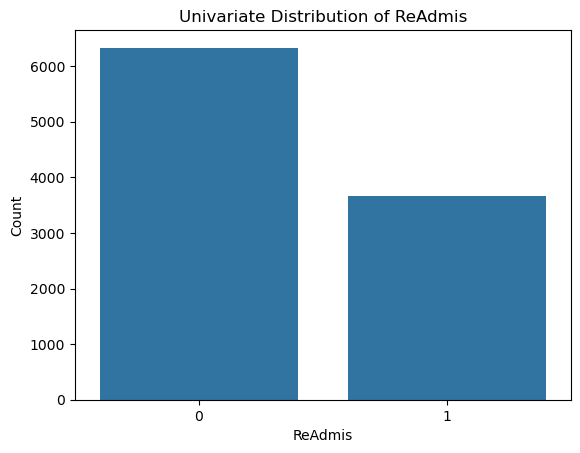

In [194]:
#the univariate distribution of ReAdmis
sns.countplot(x='ReAdmis', data=df)
plt.title('Univariate Distribution of ReAdmis')
plt.xlabel('ReAdmis')
plt.ylabel('Count')
plt.show()

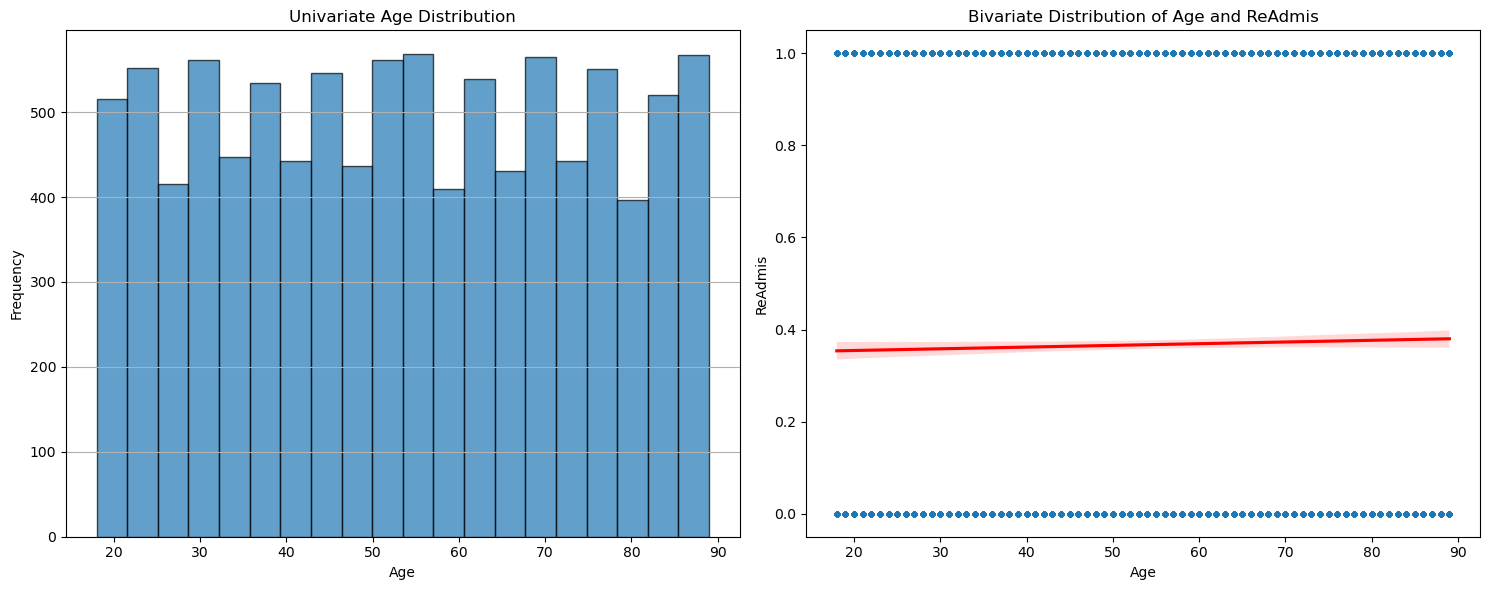

Biserial Correlation: 0.0158
P-value: 0.1139


In [195]:
# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of Age univariate distribution
ax[0].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Univariate Age Distribution')
ax[0].grid(axis='y')

# Scatter plot with regression line for bivariate distribution of Age and ReAdmis
sns.regplot(x='Age', y='ReAdmis', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('Bivariate Distribution of Age and ReAdmis')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('ReAdmis')

plt.tight_layout()
plt.show()

# Calculate biserial correlation
correlation, p_value = pointbiserialr(df['Age'], df['ReAdmis'])
print(f'Biserial Correlation: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

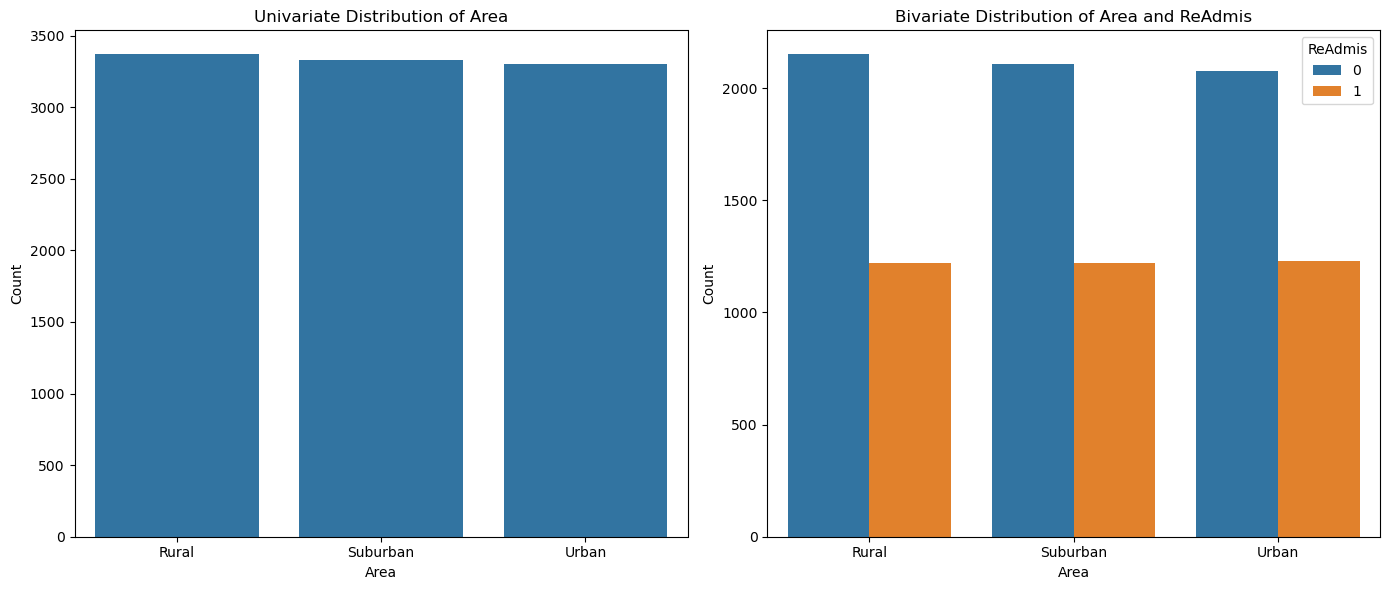

Chi-Square test result: chi2 = 0.7133125620168337, p-value = 0.7000130641731285


In [196]:
from scipy.stats import chi2_contingency

#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Area using a bar plot
plt.subplot(1, 2, 1)
area_counts = df['Area'].value_counts()
sns.barplot(x=area_counts.index, y=area_counts.values)
plt.title('Univariate Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')

#RIGHT: bivariate distribution of Area and ReAdmis
plt.subplot(1, 2, 2)
sns.countplot(x='Area', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Area and ReAdmis')
plt.xlabel('Area')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Area'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

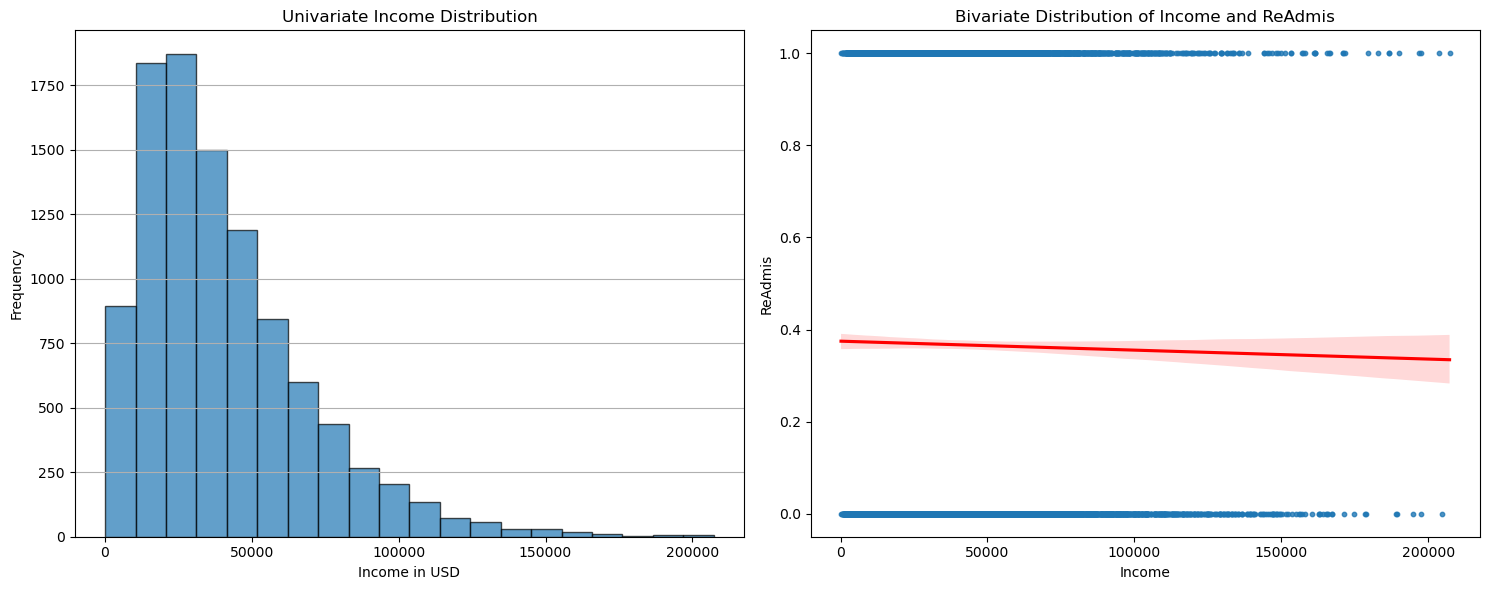

Biserial Correlation: -0.0115
P-value: 0.2500


In [197]:
#create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#histogram of Income univariate distribution
ax[0].hist(df['Income'], bins=20, edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Income in USD')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Univariate Income Distribution')
ax[0].grid(axis='y')

#scatter plot with regression line for bivariate distribution for Income and ReAdmis
sns.regplot(x='Income', y='ReAdmis', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('Bivariate Distribution of Income and ReAdmis')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('ReAdmis')

plt.tight_layout()
plt.show()

#calculate biserial correlation
correlation, p_value = pointbiserialr(df['Income'], df['ReAdmis'])
print(f'Biserial Correlation: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

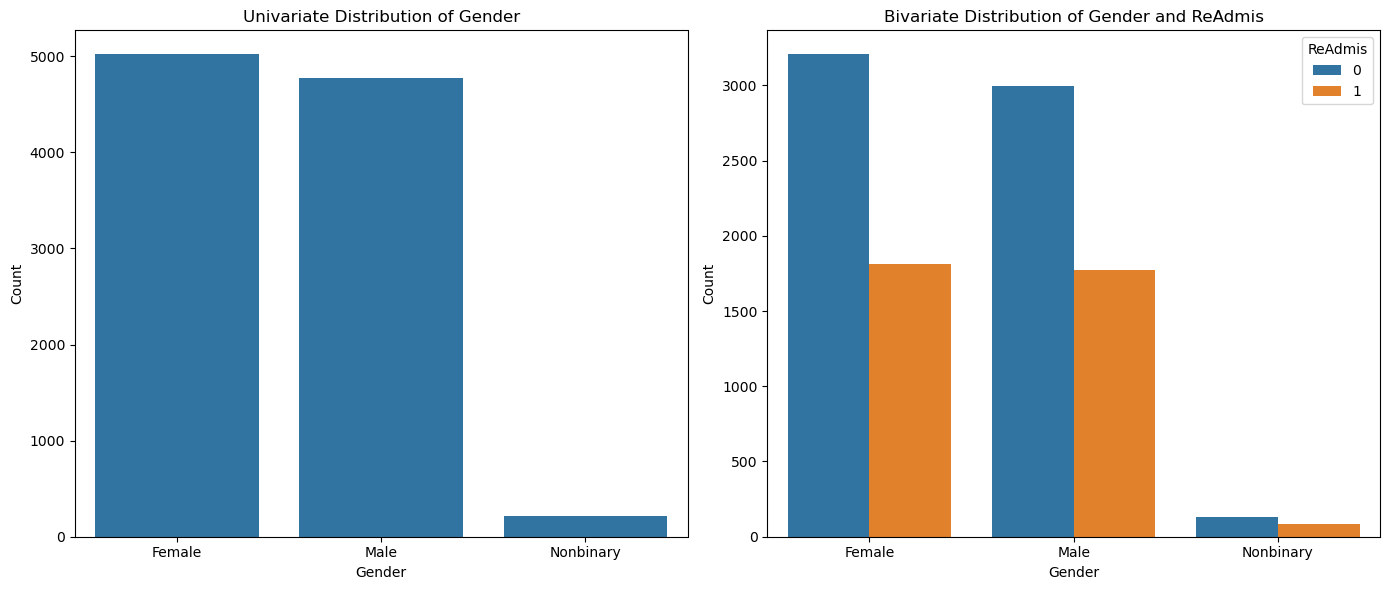

Chi-Square test result: chi2 = 1.5857714961641314, p-value = 0.4525370014241822


In [198]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Gender using a bar plot
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Univariate Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

#RIGHT: bivariate distribution of Gender and ReAdmis 
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Gender and ReAdmis')
plt.xlabel('Gender')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Gender'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

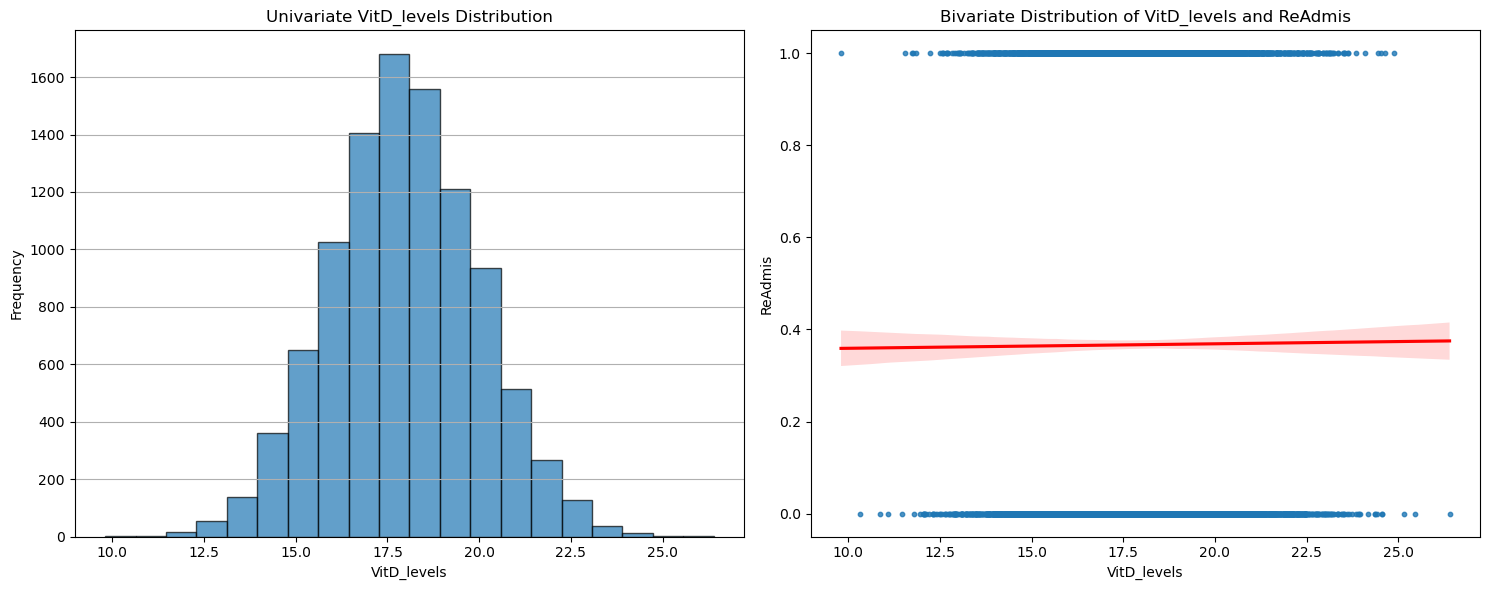

Biserial Correlation: 0.0041
P-value: 0.6831


In [199]:
#create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#histogram of VitD_levels univariate distribution
ax[0].hist(df['VitD_levels'], bins=20, edgecolor='black', alpha=0.7)
ax[0].set_xlabel('VitD_levels')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Univariate VitD_levels Distribution')
ax[0].grid(axis='y')

#scatter plot with regression line for bivariate distribution of VitD_levels and ReAdmis
sns.regplot(x='VitD_levels', y='ReAdmis', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('Bivariate Distribution of VitD_levels and ReAdmis')
ax[1].set_xlabel('VitD_levels')
ax[1].set_ylabel('ReAdmis')

plt.tight_layout()
plt.show()

#calculate biserial correlation
correlation, p_value = pointbiserialr(df['VitD_levels'], df['ReAdmis'])
print(f'Biserial Correlation: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

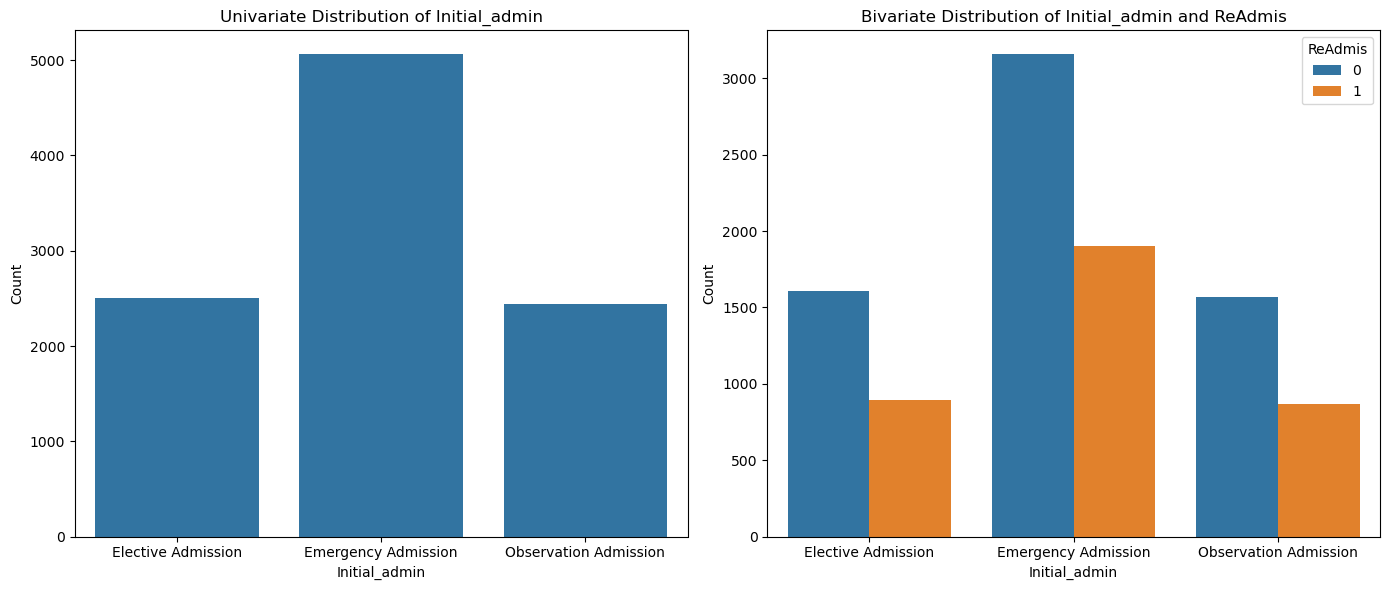

Chi-Square test result: chi2 = 3.889967990333648, p-value = 0.14298951184306222


In [200]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Initial_admin using a bar plot
plt.subplot(1, 2, 1)
initial_admin_counts = df['Initial_admin'].value_counts()
sns.barplot(x=initial_admin_counts.index, y=initial_admin_counts.values)
plt.title('Univariate Distribution of Initial_admin')
plt.xlabel('Initial_admin')
plt.ylabel('Count')

#RIGHT: bivariate distribution of Initial_admin and ReAdmis 
plt.subplot(1, 2, 2)
sns.countplot(x='Initial_admin', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Initial_admin and ReAdmis')
plt.xlabel('Initial_admin')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Initial_admin'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

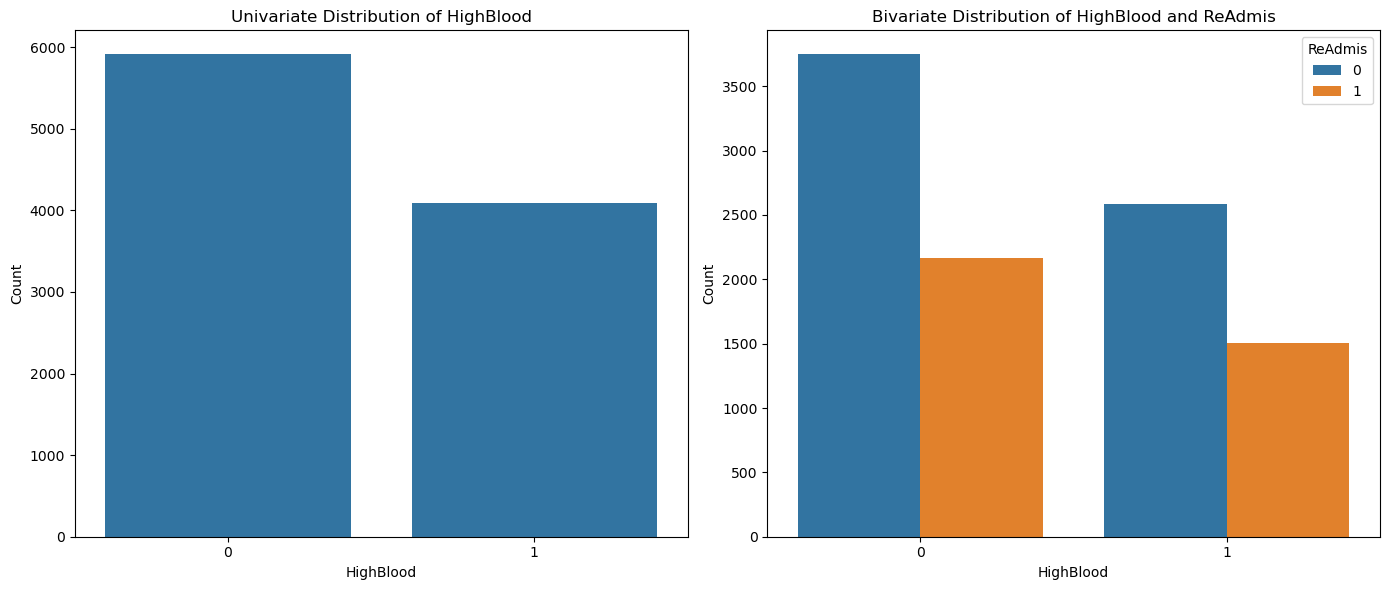

Chi-Square test result: chi2 = 0.04239657973011679, p-value = 0.8368656684578771


In [201]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of HighBlood using a bar plot
plt.subplot(1, 2, 1)
highblood_counts = df['HighBlood'].value_counts()
sns.barplot(x=highblood_counts.index, y=highblood_counts.values)
plt.title('Univariate Distribution of HighBlood')
plt.xlabel('HighBlood')
plt.ylabel('Count')

#RIGHT: bivariate distribution of HighBlood and ReAdmis
plt.subplot(1, 2, 2)
sns.countplot(x='HighBlood', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of HighBlood and ReAdmis')
plt.xlabel('HighBlood')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['HighBlood'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

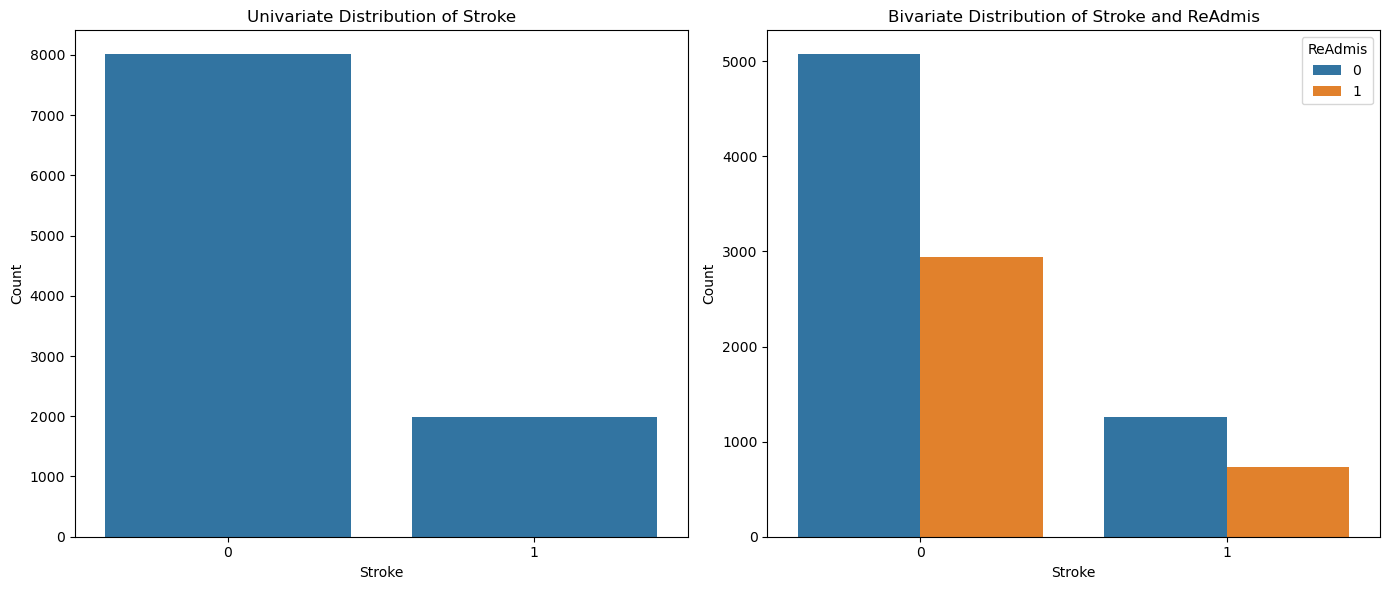

Chi-Square test result: chi2 = 0.004339571341125097, p-value = 0.9474770077616069


In [202]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Stroke using a bar plot
plt.subplot(1, 2, 1)
stroke_counts = df['Stroke'].value_counts()
sns.barplot(x=stroke_counts.index, y=stroke_counts.values)
plt.title('Univariate Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')

#RIGHT: bivariate distribution of Stroke and ReAdmis
plt.subplot(1, 2, 2)
sns.countplot(x='Stroke', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Stroke and ReAdmis')
plt.xlabel('Stroke')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Stroke'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

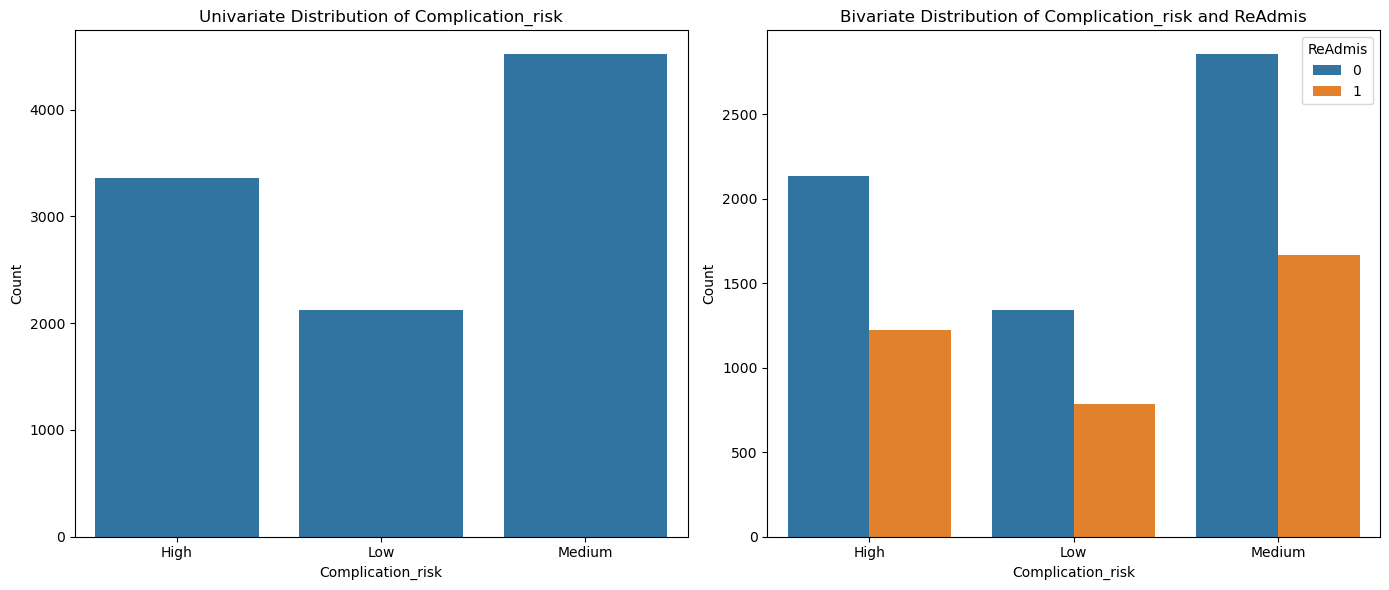

Chi-Square test result: chi2 = 0.15902193516217972, p-value = 0.923567890607327


In [203]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Complication_risk using a bar plot
plt.subplot(1, 2, 1)
complication_risk_counts = df['Complication_risk'].value_counts()
sns.barplot(x=complication_risk_counts.index, y=complication_risk_counts.values)
plt.title('Univariate Distribution of Complication_risk')
plt.xlabel('Complication_risk')
plt.ylabel('Count')

#RIGHT: bivariate distribution of Complication_risk and ReAdmis 
plt.subplot(1, 2, 2)
sns.countplot(x='Complication_risk', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Complication_risk and ReAdmis')
plt.xlabel('Complication_risk')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Complication_risk'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

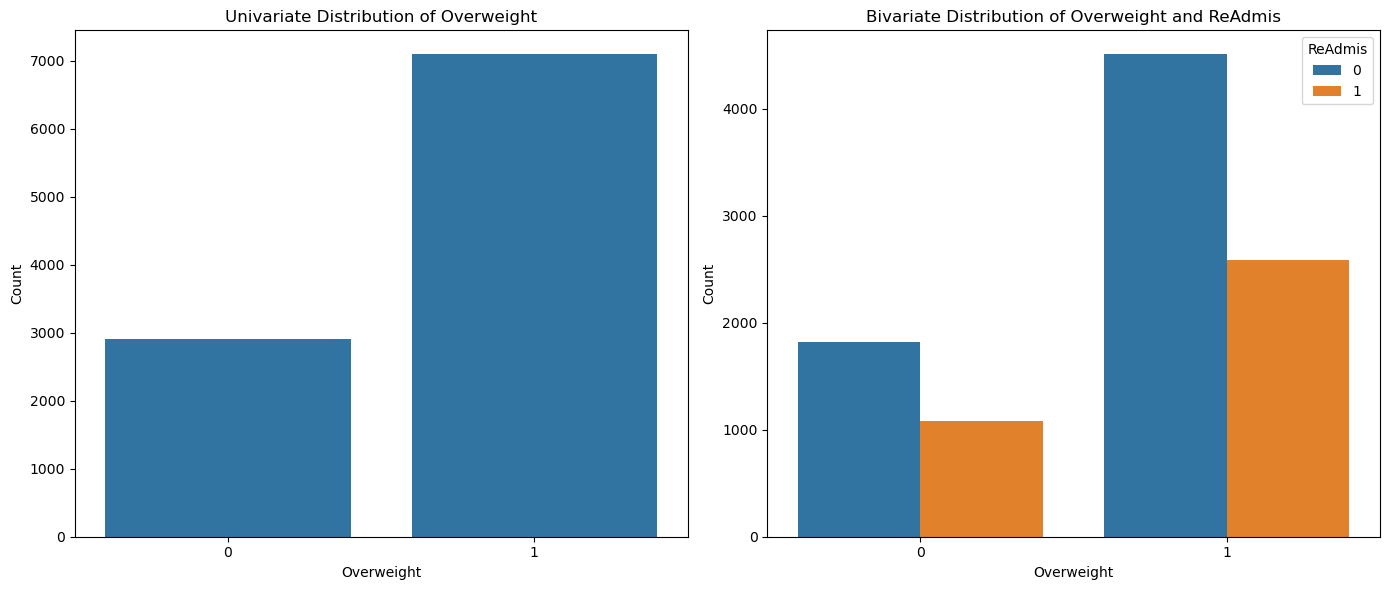

Chi-Square test result: chi2 = 0.6984802059617876, p-value = 0.4032948387365496


In [204]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Overweight using a bar plot
plt.subplot(1, 2, 1)
overweight_counts = df['Overweight'].value_counts()
sns.barplot(x=overweight_counts.index, y=overweight_counts.values)
plt.title('Univariate Distribution of Overweight')
plt.xlabel('Overweight')
plt.ylabel('Count')

#RIGHT: bivariate distribution of Overweight and ReAdmis 
plt.subplot(1, 2, 2)
sns.countplot(x='Overweight', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Overweight and ReAdmis')
plt.xlabel('Overweight')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Overweight'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

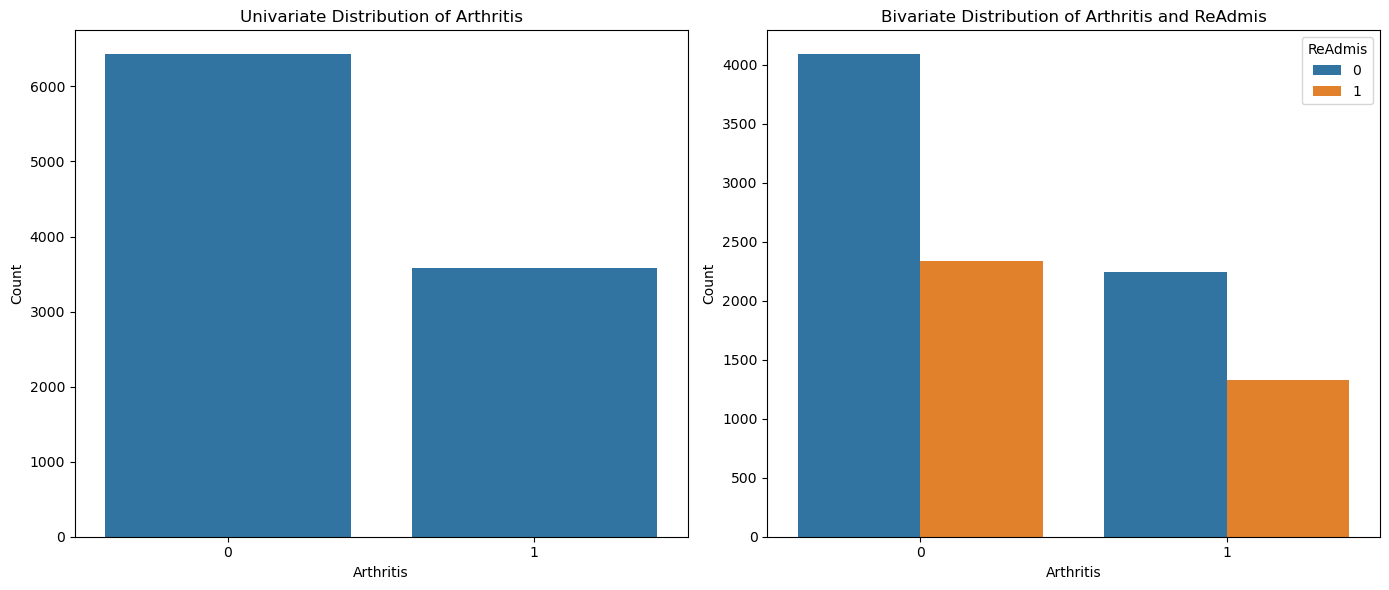

Chi-Square test result: chi2 = 0.5545124468934712, p-value = 0.456479750124403


In [205]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Arthritis using a bar plot
plt.subplot(1, 2, 1)
arthritis_counts = df['Arthritis'].value_counts()
sns.barplot(x=arthritis_counts.index, y=arthritis_counts.values)
plt.title('Univariate Distribution of Arthritis')
plt.xlabel('Arthritis')
plt.ylabel('Count')

#RIGHT: Bivariate distribution of Arthritis and ReAdmis 
plt.subplot(1, 2, 2)
sns.countplot(x='Arthritis', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Arthritis and ReAdmis')
plt.xlabel('Arthritis')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Arthritis'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

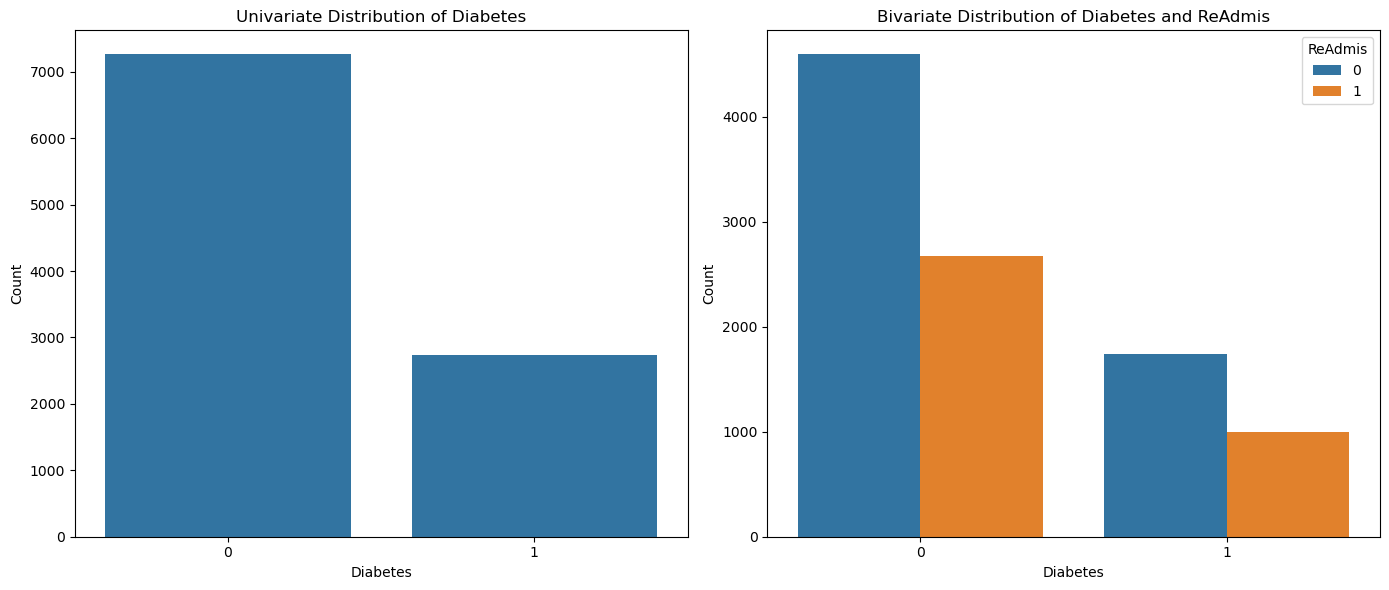

Chi-Square test result: chi2 = 0.07983299478166737, p-value = 0.7775238586920562


In [206]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Diabetes 
plt.subplot(1, 2, 1)
diabetes_counts = df['Diabetes'].value_counts()
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values)
plt.title('Univariate Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')

#RIGHT: Bivariate distribution of Diabetes and ReAdmis 
plt.subplot(1, 2, 2)
sns.countplot(x='Diabetes', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Diabetes and ReAdmis')
plt.xlabel('Diabetes')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Diabetes'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

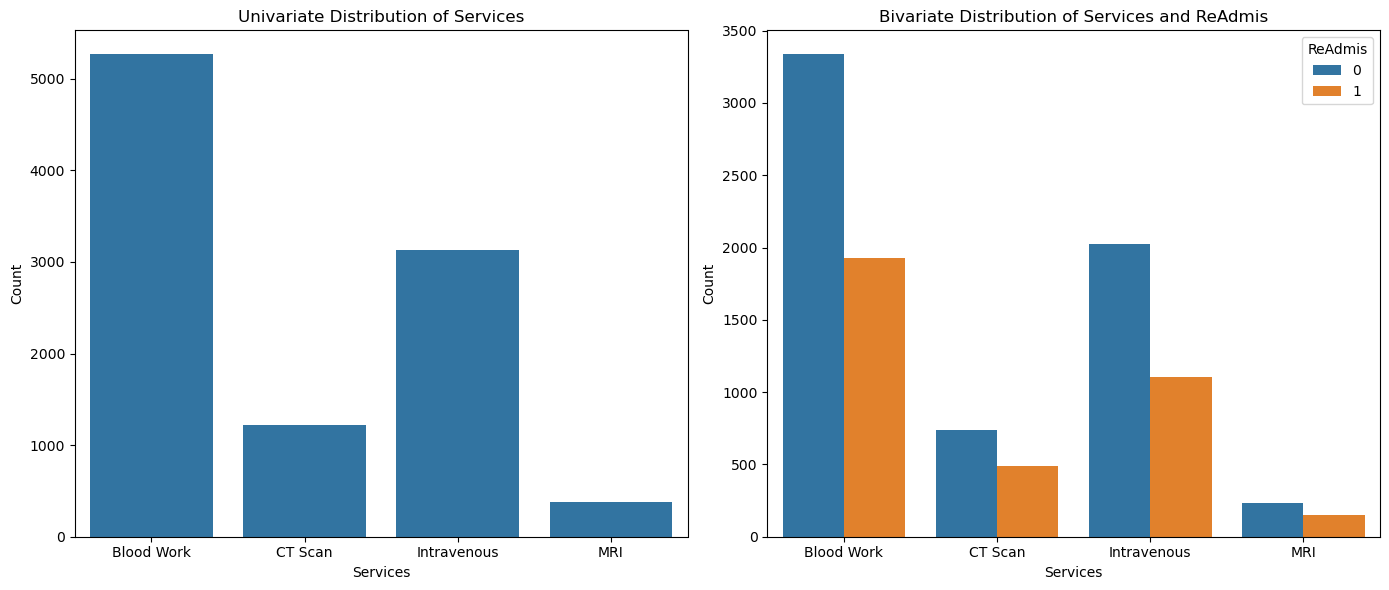

Chi-Square test result: chi2 = 8.892645054628435, p-value = 0.03075281113212747


In [207]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT: univariate distribution of Services 
plt.subplot(1, 2, 1)
services_counts = df['Services'].value_counts()
sns.barplot(x=services_counts.index, y=services_counts.values)
plt.title('Univariate Distribution of Services')
plt.xlabel('Services')
plt.ylabel('Count')

#RIGHT: bivariate distribution of Services and ReAdmis 
plt.subplot(1, 2, 2)
sns.countplot(x='Services', hue='ReAdmis', data=df)
plt.title('Bivariate Distribution of Services and ReAdmis')
plt.xlabel('Services')
plt.ylabel('Count')

#show the plots
plt.tight_layout()
plt.show()

#calculate correlation using Chi-Square test
contingency_table = pd.crosstab(df['Services'], df['ReAdmis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square test result: chi2 = {chi2}, p-value = {p}')

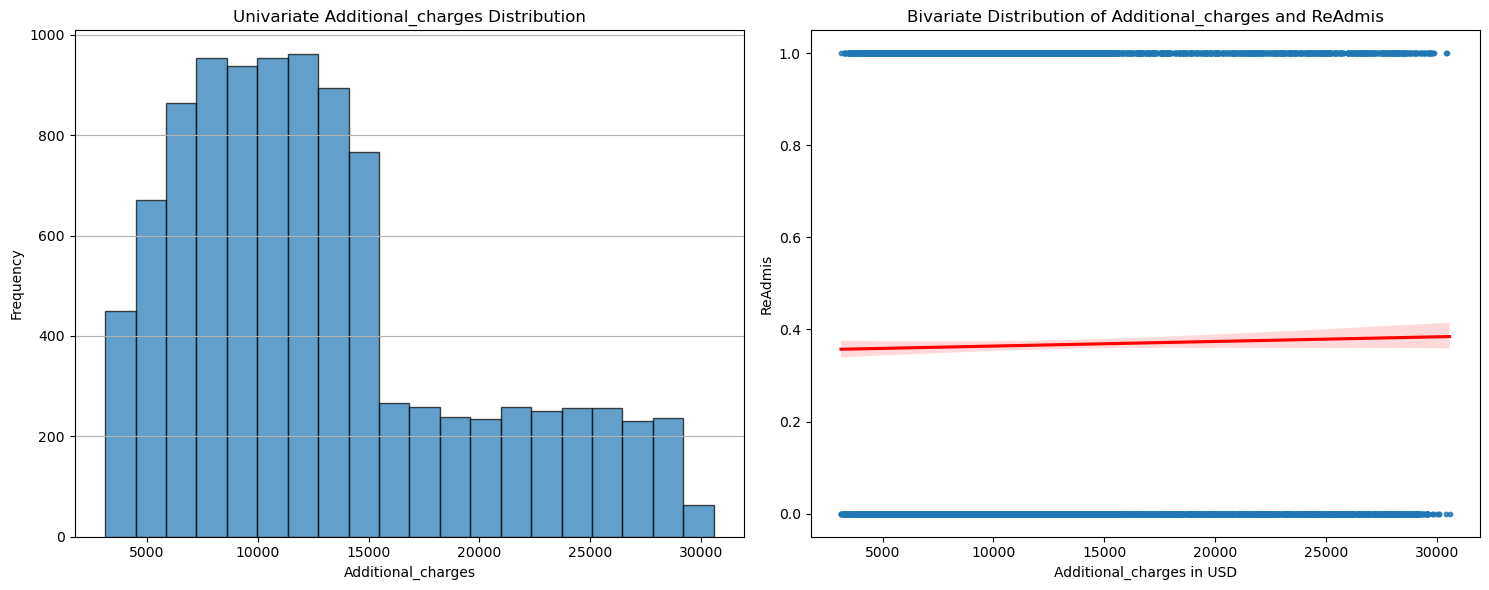

Biserial Correlation: 0.0136
P-value: 0.1732


In [208]:
#create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#histogram of Additional_charges univariate distribution
ax[0].hist(df['Additional_charges'], bins=20, edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Additional_charges')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Univariate Additional_charges Distribution')
ax[0].grid(axis='y')

#scatter plot with regression line for bivariate distribution of Additional_charges and ReAdmis
sns.regplot(x='Additional_charges', y='ReAdmis', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('Bivariate Distribution of Additional_charges and ReAdmis')
ax[1].set_xlabel('Additional_charges in USD')
ax[1].set_ylabel('ReAdmis')

plt.tight_layout()
plt.show()

#calculate biserial correlation
correlation, p_value = pointbiserialr(df['Additional_charges'], df['ReAdmis'])
print(f'Biserial Correlation: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

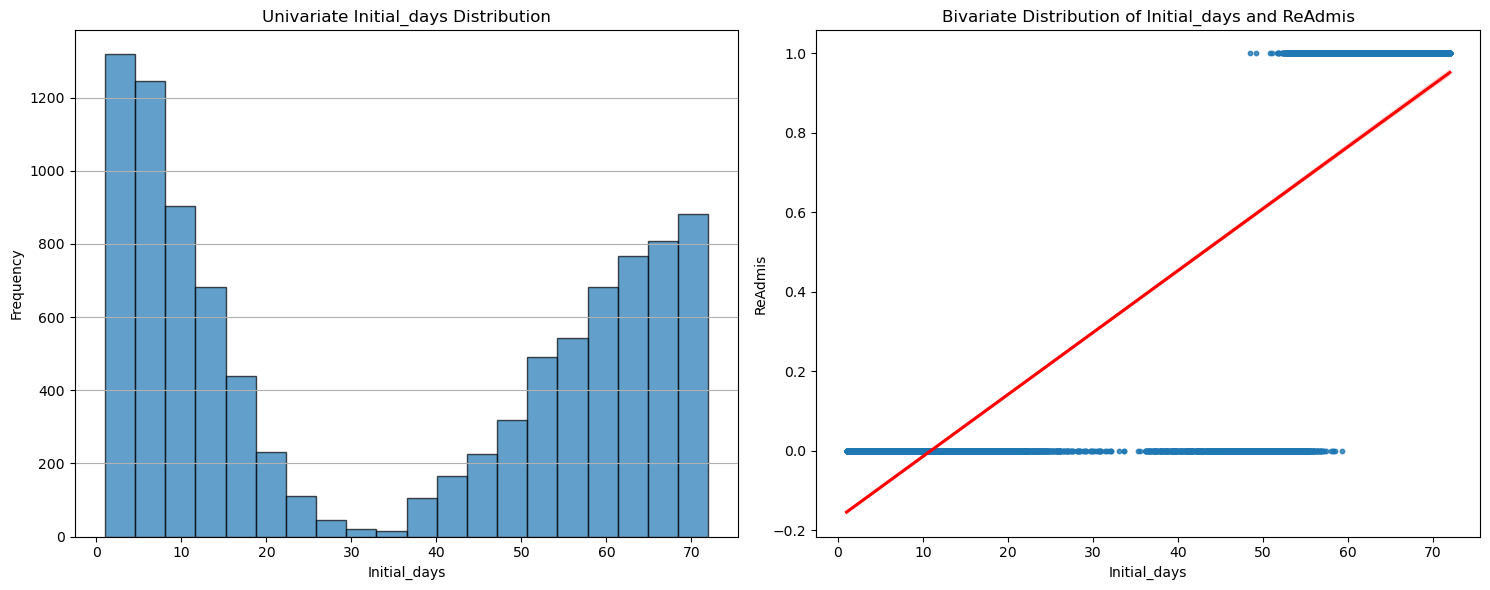

Biserial Correlation: 0.8509
P-value: 0.0000


In [209]:
#create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#histogram of Initial_days univariate distribution
ax[0].hist(df['Initial_days'], bins=20, edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Initial_days')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Univariate Initial_days Distribution')
ax[0].grid(axis='y')

#scatter plot with regression line for bivariate distribution of Initial_days and ReAdmis
sns.regplot(x='Initial_days', y='ReAdmis', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('Bivariate Distribution of Initial_days and ReAdmis')
ax[1].set_xlabel('Initial_days')
ax[1].set_ylabel('ReAdmis')

plt.tight_layout()
plt.show()

#calculate biserial correlation
correlation, p_value = pointbiserialr(df['Initial_days'], df['ReAdmis'])
print(f'Biserial Correlation: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

In [210]:
#set the pandas option to opt-in to the future behavior
pd.set_option('future.no_silent_downcasting', True)

#One Hot Encoding using get_dummies
df_regress = pd.get_dummies(df, columns=['Area', 'Gender', 'Initial_admin', 'Complication_risk', 'Services'], drop_first=True)

df_regress = df_regress.replace({True: 1, False: 0})

#convert all columns to numeric
df_regress = df_regress.apply(pd.to_numeric)

df_regress


,Age,Income,ReAdmis,VitD_levels,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Initial_days,Additional_charges,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_Low,Complication_risk_Medium,Services_CT Scan,Services_Intravenous,Services_MRI
CaseOrder,,,,,,,,,,,,,,,,,,,,,,
1,53,86575.93,0,19.141466,1,0,0,1,1,10.585770,17939.403420,1,0,1,0,1,0,0,1,0,0,0
2,51,46805.99,0,18.940352,1,0,1,0,0,15.129562,17612.998120,0,1,0,0,1,0,0,0,0,1,0
3,53,14370.14,0,18.057507,1,0,1,0,1,4.772177,17505.192460,1,0,0,0,0,0,0,1,0,0,0
4,78,39741.49,0,16.576858,0,1,0,1,0,1.714879,12993.437350,1,0,1,0,0,0,0,1,0,0,0
5,22,1209.56,0,17.439069,0,0,0,0,0,1.254807,3716.525786,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,25,45967.61,0,16.980860,1,0,0,0,0,51.561220,8927.642000,0,1,1,0,1,0,0,1,0,1,0
9997,87,14983.02,1,18.177020,1,0,1,1,1,68.668240,28507.150000,0,1,1,0,0,0,0,1,1,0,0
9998,45,65917.81,1,17.129070,1,0,1,0,0,70.154180,15281.210000,0,0,0,0,0,0,0,0,0,1,0


In [211]:
df_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   Income                               10000 non-null  float64
 2   ReAdmis                              10000 non-null  int64  
 3   VitD_levels                          10000 non-null  float64
 4   HighBlood                            10000 non-null  int64  
 5   Stroke                               10000 non-null  int64  
 6   Overweight                           10000 non-null  int64  
 7   Arthritis                            10000 non-null  int64  
 8   Diabetes                             10000 non-null  int64  
 9   Initial_days                         10000 non-null  float64
 10  Additional_charges                   10000 non-null  float64
 11  Area_Suburban                    

In [212]:
#prepared dataset to csv file
df_regress.to_csv('D208_task2.csv', index=False)

In [213]:
#create the initial model

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables
X = df_regress[['Age', 'Income', 'VitD_levels', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Initial_days', 'Additional_charges', 'Area_Suburban', 'Area_Urban', 'Gender_Male', 'Gender_Nonbinary','Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]

#add a constant to the model
X = sm.add_constant(X)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036484
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9445
Time:                        13:35:00   Log-Likelihood:                -364.84
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -73.7404      3.954

In [214]:
#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables 
X = df_regress[['Age', 'Income', 'VitD_levels', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Initial_days', 'Additional_charges', 'Area_Suburban', 'Area_Urban', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission','Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]

#check VIF's to detect multicollinearity
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns

#calculate VIF for each feature
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIF's
print(vif_df)

                                feature        VIF
0                                   Age  67.949393
1                                Income   2.946395
2                           VitD_levels  21.039493
3                             HighBlood  12.925043
4                                Stroke   1.256456
5                            Overweight   3.371648
6                             Arthritis   1.553193
7                              Diabetes   1.370219
8                          Initial_days   2.676719
9                    Additional_charges  78.114005
10                        Area_Suburban   1.970359
11                           Area_Urban   1.972293
12                          Gender_Male   1.929326
13                     Gender_Nonbinary   1.043793
14    Initial_admin_Emergency Admission   2.989171
15  Initial_admin_Observation Admission   1.944311
16                Complication_risk_Low   1.644180
17             Complication_risk_Medium   2.352339
18                     Services

In [217]:
#Backward elimination: remove Additional_charges due to the the highest VIF of 78.114

#define the independent variables
X = df_regress[['Age', 'Income', 'VitD_levels', 'HighBlood', 'Stroke', 'Overweight','Arthritis', 'Diabetes', 'Initial_days','Area_Suburban', 'Area_Urban', 'Gender_Male', 'Gender_Nonbinary','Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission','Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan','Services_Intravenous', 'Services_MRI']]


#create a dataframe to hold the VIFs
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns

#calculate VIF for each variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs
print(vif_df)

                                feature        VIF
0                                   Age   7.262262
1                                Income   2.944943
2                           VitD_levels  19.301715
3                             HighBlood   1.687749
4                                Stroke   1.248174
5                            Overweight   3.371054
6                             Arthritis   1.552117
7                              Diabetes   1.370212
8                          Initial_days   2.674496
9                         Area_Suburban   1.969083
10                           Area_Urban   1.970432
11                          Gender_Male   1.927568
12                     Gender_Nonbinary   1.043791
13    Initial_admin_Emergency Admission   2.961722
14  Initial_admin_Observation Admission   1.941175
15                Complication_risk_Low   1.617189
16             Complication_risk_Medium   2.318272
17                     Services_CT Scan   1.231082
18                 Services_Int

In [218]:
#eliminate VitD_levels due to the highest VIF of 19.301

#define the independent variables
X = df_regress[["Age", "Income", "HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days", "Area_Suburban", "Area_Urban", "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan","Services_Intravenous", "Services_MRI"]]

#create a dataframe to hold the VIFs
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns

#calculate VIF for each variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs
print(vif_df)

                                feature       VIF
0                                   Age  5.594329
1                                Income  2.745119
2                             HighBlood  1.657311
3                                Stroke  1.237840
4                            Overweight  3.090610
5                             Arthritis  1.530685
6                              Diabetes  1.356019
7                          Initial_days  2.537139
8                         Area_Suburban  1.888491
9                            Area_Urban  1.870508
10                          Gender_Male  1.862043
11                     Gender_Nonbinary  1.041127
12    Initial_admin_Emergency Admission  2.672143
13  Initial_admin_Observation Admission  1.822010
14                Complication_risk_Low  1.564324
15             Complication_risk_Medium  2.202059
16                     Services_CT Scan  1.217012
17                 Services_Intravenous  1.551698
18                         Services_MRI  1.069506


In [219]:
#reduced model with VIFs higher than 10 removed.

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["Age", "Income", "HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days", "Area_Suburban", "Area_Urban", "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_Intravenous", "Services_MRI"]]

#add a constant to the model
X = sm.add_constant(X)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036562
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9444
Time:                        13:36:09   Log-Likelihood:                -365.62
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -73.3200      3.873

In [220]:
#Backward elimination by highest p-value: remove Area_Urban due to p-value of 0.891

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["Age", "Income", "HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days", "Area_Suburban", "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_Intravenous", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036563
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9444
Time:                        13:36:13   Log-Likelihood:                -365.63
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                     0.0013      0.005

In [221]:
#eliminate Income due to the highest p-value of 0.854

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["Age", "HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days","Area_Suburban", "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_Intravenous", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036565
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9444
Time:                        13:36:14   Log-Likelihood:                -365.65
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                     0.0013      0.005

In [222]:
#eliminate Services_intravenous due to the highest p-value of 0.845

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["Age", "HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days", "Area_Suburban", "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036567
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9444
Time:                        13:36:16   Log-Likelihood:                -365.67
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                     0.0013      0.005

In [223]:
#eliminate Age due to the highest p-value of 0.778

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["HighBlood", "Stroke", "Overweight","Arthritis", "Diabetes", "Initial_days", "Area_Suburban", "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036571
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9444
Time:                        13:36:18   Log-Likelihood:                -365.71
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
HighBlood                               0.7914      0.203

In [224]:
#eliminate Area_Suburban due to the highest p-value of 0.632

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days", "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036582
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9443
Time:                        13:36:19   Log-Likelihood:                -365.82
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
HighBlood                               0.7901      0.203

In [225]:
#eliminate Gender_Nonbinary due to the highest p-value of 0.369

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days", "Gender_Male", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036624
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9443
Time:                        13:36:20   Log-Likelihood:                -366.24
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
HighBlood                               0.7913      0.203

In [226]:
#Eliminate Gender_Male due to the highest p-value of 0.365

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", "Initial_days", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036665
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9442
Time:                        13:36:22   Log-Likelihood:                -366.65
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
HighBlood                               0.7833      0.202

In [227]:
#Eliminate Overweight due to the highest p-value of 0.302

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["HighBlood", "Stroke", "Arthritis", "Diabetes", "Initial_days", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Complication_risk_Medium", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036718
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9441
Time:                        13:36:23   Log-Likelihood:                -367.18
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
HighBlood                               0.7693      0.201

In [228]:
#Eliminate Complication_risk_Medium due to the highest p-value of 0.073

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["HighBlood", "Stroke", "Arthritis", "Diabetes", "Initial_days", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036880
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9439
Time:                        13:36:25   Log-Likelihood:                -368.80
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
HighBlood                               0.7571      0.200

In [229]:
#the reduced model after Backward elimination

#define the dependent variable
y = df_regress['ReAdmis']

#define the independent variables and add a constant term
X = df_regress[["HighBlood", "Stroke", "Arthritis", "Diabetes", "Initial_days", "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", "Complication_risk_Low", "Services_CT Scan", "Services_MRI"]].assign(const=1)

#fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.036880
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.9439
Time:                        13:36:26   Log-Likelihood:                -368.80
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
HighBlood                               0.7571      0.200

In [230]:
#define dependent and independent variables
X_initial = df_regress[["Age", "Income", "VitD_levels", "HighBlood", "Stroke", "Overweight", "Arthritis", 
                  "Diabetes", "Initial_days", "Additional_charges", "Area_Suburban", "Area_Urban", 
                  "Gender_Male", "Gender_Nonbinary", "Initial_admin_Emergency Admission", 
                  "Initial_admin_Observation Admission", "Complication_risk_Low", 
                  "Complication_risk_Medium", "Services_CT Scan", "Services_Intravenous", 
                  "Services_MRI"]]

X_reduced = df_regress[["HighBlood", "Stroke", "Arthritis", "Diabetes", "Initial_days", 
                  "Initial_admin_Emergency Admission", "Initial_admin_Observation Admission", 
                  "Complication_risk_Low", "Services_CT Scan", "Services_MRI"]]
y = df_regress['ReAdmis']

#add constant term
X_initial = sm.add_constant(X_initial)
X_reduced = sm.add_constant(X_reduced)

#fit the linear regression models
model_initial = sm.OLS(y, X_initial).fit()
model_reduced = sm.OLS(y, X_reduced).fit()

#calculate AIC and BIC
aic_initial = model_initial.aic
bic_initial = model_initial.bic
aic_reduced = model_reduced.aic
bic_reduced = model_reduced.bic

print(f'Initial Model AIC: {aic_initial}')
print(f'Initial Model BIC: {bic_initial}')
print(f'Reduced Model AIC: {aic_reduced}')
print(f'Reduced Model BIC: {bic_reduced}')

Initial Model AIC: 889.4194838768017
Initial Model BIC: 1048.0469720602778
Reduced Model AIC: 874.2939202907401
Reduced Model BIC: 953.6076643824781


Accuracy of logistic regression classifier on test set: 0.98
[[1909   25]
 [  28 1038]]


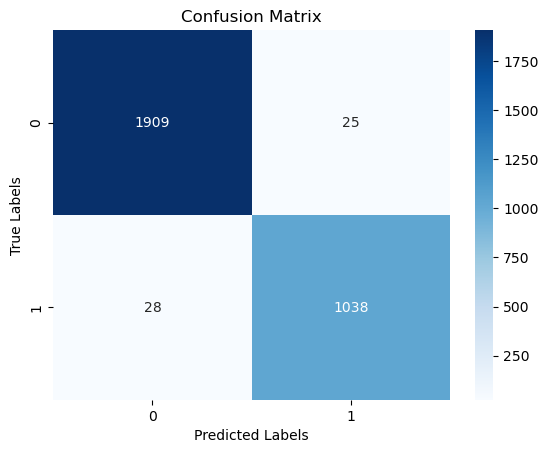

In [231]:
#calculate the confusion matrix

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

#predict the test set results
y_pred = logreg.predict(X_test)

#print the accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#compute and print the confusion matrix
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

#plot the confusion matrix as a heatmap
sns.heatmap(final_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [232]:
#evaluate the effectiveness of the model 

from sklearn.metrics import classification_report

# Evaluate the effectiveness of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.98      0.97      0.98      1066

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [233]:
#get coefficients
result.params

HighBlood                               0.757090
Stroke                                  1.511337
Arthritis                              -1.207720
Diabetes                                0.456025
Initial_days                            1.313923
Initial_admin_Emergency Admission       2.229101
Initial_admin_Observation Admission     0.717889
Complication_risk_Low                  -1.403833
Services_CT Scan                        1.385506
Services_MRI                            2.591306
const                                 -72.911618
dtype: float64

In [234]:
coefficients = {
    'HighBlood': 0.7571,
    'Stroke': 1.5113,
    'Arthritis': -1.2077,
    'Diabetes': 0.4560,
    'Initial_days': 1.3139,
    'Initial_admin_Emergency Admission': 2.2291,
    'Initial_admin_Observation Admission': 0.7179,
    'Complication_risk_Low': -1.4038,
    'Services_CT Scan': 1.3855,
    'Services_MRI': 2.5913
}

#calculate and print the odds ratios and percentage change in odds
for feature, coef in coefficients.items():
    odds_ratio = np.exp(coef)
    change_in_odds = (odds_ratio - 1) * 100
    print(f"The odds ratio for {feature} is {round(odds_ratio, 4)}. Given this, the change in odds for ReAdmis is {round(change_in_odds, 4)}%")

The odds ratio for HighBlood is 2.1321. Given this, the change in odds for ReAdmis is 113.2084%
The odds ratio for Stroke is 4.5326. Given this, the change in odds for ReAdmis is 353.2619%
The odds ratio for Arthritis is 0.2989. Given this, the change in odds for ReAdmis is -70.1116%
The odds ratio for Diabetes is 1.5778. Given this, the change in odds for ReAdmis is 57.775%
The odds ratio for Initial_days is 3.7207. Given this, the change in odds for ReAdmis is 272.0656%
The odds ratio for Initial_admin_Emergency Admission is 9.2915. Given this, the change in odds for ReAdmis is 829.15%
The odds ratio for Initial_admin_Observation Admission is 2.0501. Given this, the change in odds for ReAdmis is 105.0123%
The odds ratio for Complication_risk_Low is 0.2457. Given this, the change in odds for ReAdmis is -75.4338%
The odds ratio for Services_CT Scan is 3.9968. Given this, the change in odds for ReAdmis is 299.6824%
The odds ratio for Services_MRI is 13.3471. Given this, the change in od